In [12]:
# 导入库和定义函数
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CONFIG
# load 
data_path = 'datasets/BV12i42167pY1.csv'
combination_data_path = 'datasets/17分区评论合集.csv'
two_irony_data = 'datasets/BV12i42167pY_BV1rx4y1t7sq.csv'

In [13]:
# 游览与检查数据数据
# df = pd.read_csv(data_path, encoding='ansi')
# print(df.T.count(axis=1))  # 检查是否有缺失值
df = pd.read_csv(two_irony_data, encoding='ansi')
correck_label_ls = [0 , 1, 2]
misstake_df = df[(~df['情感标签'].isin(correck_label_ls)) | (~df['讽刺标签1'].isin(correck_label_ls)) | (~df['讽刺标签2'].isin(correck_label_ls)) ]
if misstake_df.shape[0] == 0:
    print('[No Misstake Data]')
else:
    print('[Mistake Data]')
    print(misstake_df)
# 注意人工标注的数据需要对标注进行检查：例如缺失值，异常值，
df = pd.read_csv(data_path, encoding='ansi', dtype={'情感标签':'int', '讽刺标签1':'int', '讽刺标签2':'int'})  # 默认以utf-8解码会报错
print(df.head())

[Mistake Data]
       Comment_ID Comment_Name Comment_Content Comment_Time  情感标签  讽刺标签1  \
1542  632000000.0         跨市昂幼  别委屈了自己，想玩混测就玩。     2024/8/1     1    NaN   

      讽刺标签2  
1542      0  
     Comment_ID      Comment_Name  \
0  4.734421e+08            括号删干净啊   
1  1.113020e+09        每天都要看兔女郎跳舞   
2  1.322819e+07               垣也_   
3  4.296435e+08  30449007305_bili   
4  7.030607e+08              额滴可汗   

                                     Comment_Content Comment_Time  简单标签  情感标签  \
0                                    绝世好活 近半年来看过最好的活    2024/7/22   NaN     0   
1  [抱拳]米站是这样的，用户只需要发信息就好了，而米站要考虑的就多了。删谁的评论，不删谁的评论...    2024/7/22   NaN     2   
2          抛开事实不谈，这剧情难道不好嘛？自律人一天闹麻了，我双手双脚支持策划多来点[喜欢]    2024/7/22   NaN     2   
3  原神这都是被带节奏的，故意抹黑的，这次剧情非常好，我也十分喜欢，刚好5.0马上来了，是入坑原...    2024/7/23   NaN     2   
4                     无条件支持米哈游公司的一切决议！谁能有意见？谁敢有意见！！！    2024/7/22   NaN     2   

   讽刺标签1  讽刺标签2  
0      2      2  
1      2      2  
2      2      2  
3      2      2  
4   

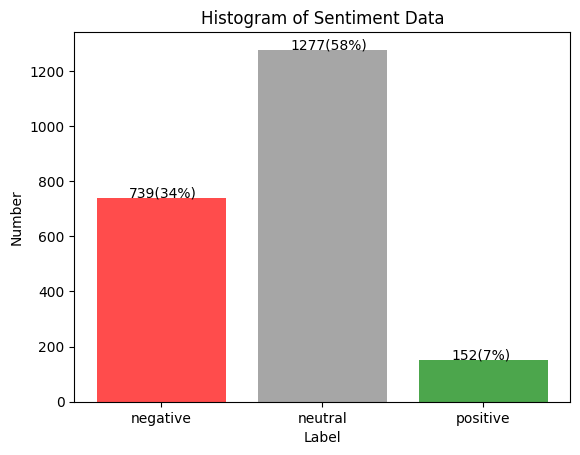

In [14]:
# 分析情绪标签分布
df = pd.read_csv(two_irony_data, encoding='ansi')
count_sentiment_series = df[['情感标签']].value_counts()
labels = ['negative','neutral','positive']
data=[count_sentiment_series[0], count_sentiment_series[1], count_sentiment_series[2]]
sum_number = sum(data)
x_pos = np.arange(len(data))
bars = plt.bar(x_pos, data, align='center', alpha=0.7, tick_label=labels, color=['r', 'grey', 'g'])
for i, y in enumerate(data):
    plt.text(x_pos[i] - 0.2, y + 1.5, f'{y}({int(y/sum_number*100)}%)', )  # 添加标注
plt.title('Histogram of Sentiment Data')
plt.xlabel('Label')
plt.ylabel('Number')
plt.show()

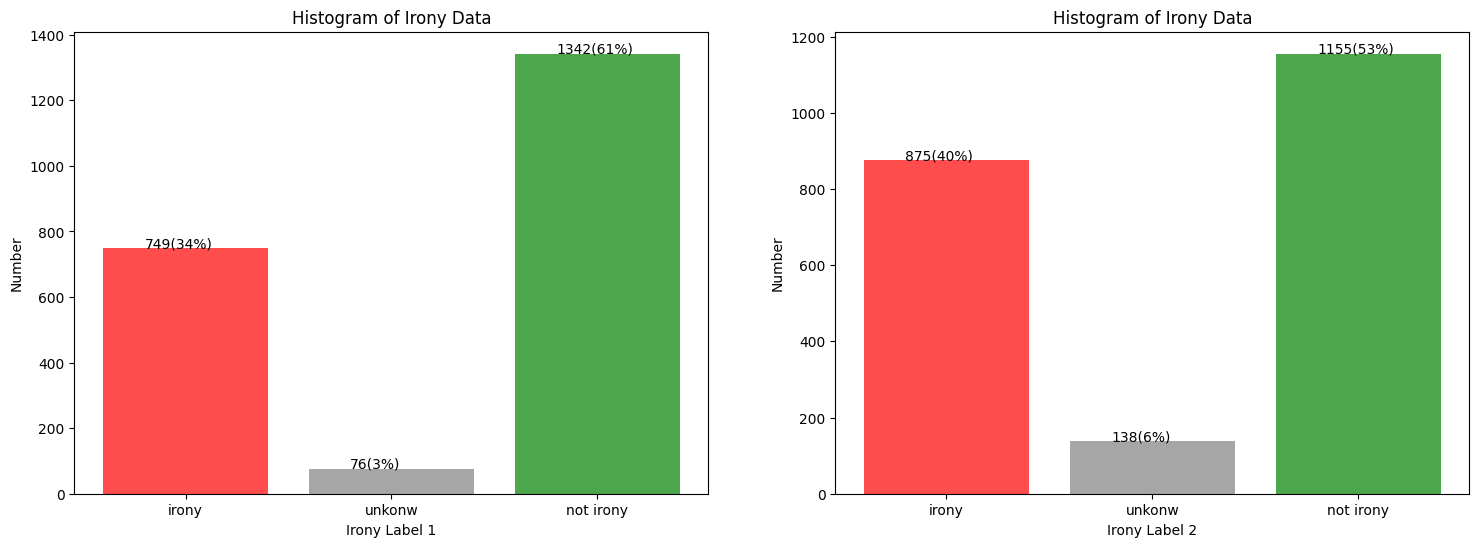

In [15]:
# 分析讽刺标签分布
df = pd.read_csv(two_irony_data, encoding='ansi')
plt.figure(figsize=(18,6))
# 讽刺标签1图
plt.subplot(1, 2, 1)
count_sentiment_series = df[['讽刺标签1']].value_counts()
labels = ['not irony','unkonw','irony']
data=[count_sentiment_series[0], count_sentiment_series[1], count_sentiment_series[2]]
labels.reverse()  # 调换列表的方向，让其与颜色对应，红色才代表讽刺
data.reverse()
sum_number = sum(data)
x_pos = np.arange(len(data))
bars = plt.bar(x_pos, data, align='center', alpha=0.7, tick_label=labels, color=['r', 'grey', 'g'])
for i, y in enumerate(data):
    plt.text(x_pos[i] - 0.2, y + 1.5, f'{y}({int(y/sum_number*100)}%)', )  # 添加标注
plt.title('Histogram of Irony Data')
plt.xlabel('Irony Label 1')
plt.ylabel('Number')
# 讽刺标签2图
plt.subplot(1, 2, 2)
count_sentiment_series = df[['讽刺标签2']].value_counts()
labels = ['not irony','unkonw','irony']
data=[count_sentiment_series[0], count_sentiment_series[1], count_sentiment_series[2]]
labels.reverse()  # 调换列表的方向，让其与颜色对应，红色才代表讽刺
data.reverse()
sum_number = sum(data)
x_pos = np.arange(len(data))
bars = plt.bar(x_pos, data, align='center', alpha=0.7, tick_label=labels, color=['r', 'grey', 'g'])
for i, y in enumerate(data):
    plt.text(x_pos[i] - 0.2, y + 1.5, f'{y}({int(y/sum_number*100)}%)', )  # 添加标注
plt.title('Histogram of Irony Data')
plt.xlabel('Irony Label 2')
plt.ylabel('Number')

# plt.tight_layout(pad=30)
plt.show()

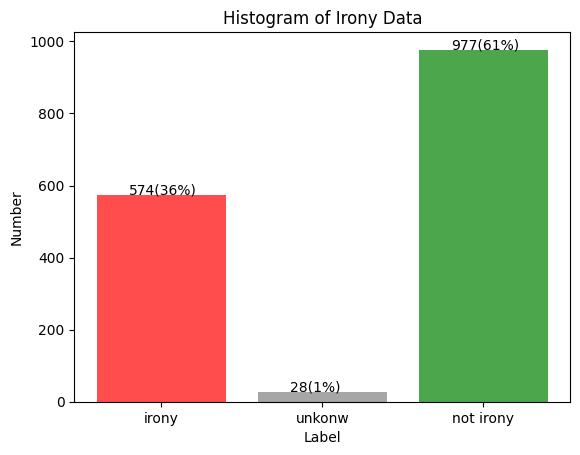

In [16]:
# 分析讽刺标签分布，只取标签1和2相同的部分
df = pd.read_csv(two_irony_data, encoding='ansi')
df = df[(df['讽刺标签1'] == df['讽刺标签2'])]
count_sentiment_series = df[['讽刺标签1']].value_counts()
labels = ['not irony','unkonw','irony']
data=[count_sentiment_series[0], count_sentiment_series[1], count_sentiment_series[2]]
# 调换列表的方向，让其与颜色对应，红色才代表讽刺
labels.reverse()
data.reverse()
sum_number = sum(data)
x_pos = np.arange(len(data))
bars = plt.bar(x_pos, data, align='center', alpha=0.7, tick_label=labels, color=['r', 'grey', 'g'])
for i, y in enumerate(data):
    plt.text(x_pos[i] - 0.2, y + 1.5, f'{y}({int(y/sum_number*100)}%)', )  # 添加标注
plt.title('Histogram of Irony Data')
plt.xlabel('Label')
plt.ylabel('Number')
plt.show()

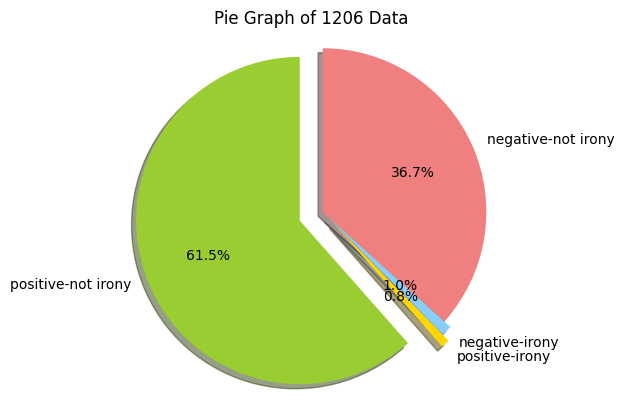

In [18]:
# 绘制饼图
# df = pd.read_csv(two_irony_data, encoding='ansi', dtype={'情感标签':'int', '讽刺标签1':'int', '讽刺标签2':'int'})
df = pd.read_csv(combination_data_path, encoding='ansi')
df = df[(df['讽刺标签1'] == df['讽刺标签2'])]
df = df[df['情感标签'] != 1]
df.loc[(df['情感标签'] == 2)&(df['讽刺标签1'] == 0), "mix_label" ] = 3
df.loc[(df['情感标签'] == 2)&(df['讽刺标签1'] == 2), "mix_label" ] = 2
df.loc[(df['情感标签'] == 0)&(df['讽刺标签1'] == 2), "mix_label" ] = 1
df.loc[(df['情感标签'] == 0)&(df['讽刺标签1'] == 0), "mix_label" ] = 0
labels = 'positive-not irony', 'positive-irony', 'negative-irony', 'negative-not irony'  # 定义标签
count_mix_label_series = df[['mix_label']].value_counts()
count_mix_label_n_ls = [count_mix_label_series[3], count_mix_label_series[2], count_mix_label_series[1], count_mix_label_series[0]]
count_mix_label_percentage_ls = [x/sum(count_mix_label_n_ls)*100 for x in count_mix_label_n_ls]
sizes = count_mix_label_percentage_ls  # 每一块的比例
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']  # 每一块的颜色
explode = (0.15, 0.1, 0.05, 0)  # 突出显示
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # 显示为圆（避免比例压缩为椭圆）
data_n = df.shape[0]
plt.title(f'Pie Graph of {data_n} Data')
plt.show()

In [120]:
# 游览与检查数据数据
# df = pd.read_csv(data_path, encoding='ansi')
# print(df.T.count(axis=1))  # 检查是否有缺失值
df = pd.read_csv(data_path, encoding='ansi')
correck_label_ls = [0 , 1, 2]
misstake_df = df[(~df['情感标签'].isin(correck_label_ls)) | (~df['讽刺标签1'].isin(correck_label_ls)) | (~df['讽刺标签2'].isin(correck_label_ls)) ]
if misstake_df.shape[0] == 0:
    print('[No Misstake Data]')
else:
    print('[Mistake Data]')
    print(misstake_df)
# 注意人工标注的数据需要对标注进行检查：例如缺失值，异常值，
df = pd.read_csv(data_path, encoding='ansi', dtype={'情感标签':'int', '讽刺标签1':'int', '讽刺标签2':'int'})  # 默认以utf-8解码会报错
print(df.head())

[No Misstake Data]
     Comment_ID      Comment_Name  \
0  4.734421e+08            括号删干净啊   
1  1.113020e+09        每天都要看兔女郎跳舞   
2  1.322819e+07               垣也_   
3  4.296435e+08  30449007305_bili   
4  7.030607e+08              额滴可汗   

                                     Comment_Content Comment_Time  简单标签  情感标签  \
0                                    绝世好活 近半年来看过最好的活    2024/7/22   NaN     0   
1  [抱拳]米站是这样的，用户只需要发信息就好了，而米站要考虑的就多了。删谁的评论，不删谁的评论...    2024/7/22   NaN     2   
2          抛开事实不谈，这剧情难道不好嘛？自律人一天闹麻了，我双手双脚支持策划多来点[喜欢]    2024/7/22   NaN     2   
3  原神这都是被带节奏的，故意抹黑的，这次剧情非常好，我也十分喜欢，刚好5.0马上来了，是入坑原...    2024/7/23   NaN     2   
4                     无条件支持米哈游公司的一切决议！谁能有意见？谁敢有意见！！！    2024/7/22   NaN     2   

   讽刺标签1  讽刺标签2  
0      2      2  
1      2      2  
2      2      2  
3      2      2  
4      2      2  


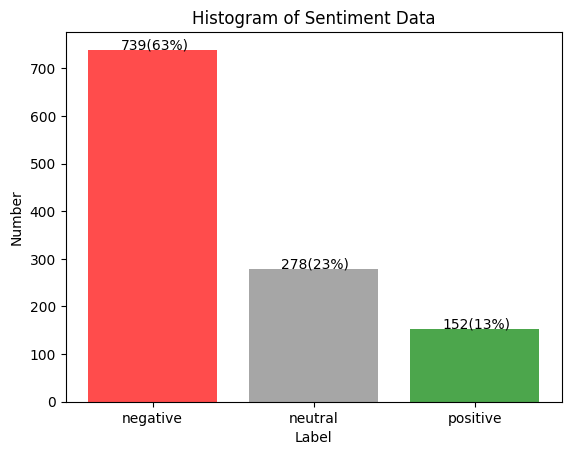

In [121]:
# 分析情绪标签分布
df = pd.read_csv(data_path, encoding='ansi')
count_sentiment_series = df[['情感标签']].value_counts()
labels = ['negative','neutral','positive']
data=[count_sentiment_series[0], count_sentiment_series[1], count_sentiment_series[2]]
sum_number = sum(data)
x_pos = np.arange(len(data))
bars = plt.bar(x_pos, data, align='center', alpha=0.7, tick_label=labels, color=['r', 'grey', 'g'])
for i, y in enumerate(data):
    plt.text(x_pos[i] - 0.2, y + 1.5, f'{y}({int(y/sum_number*100)}%)', )  # 添加标注
plt.title('Histogram of Sentiment Data')
plt.xlabel('Label')
plt.ylabel('Number')
plt.show()

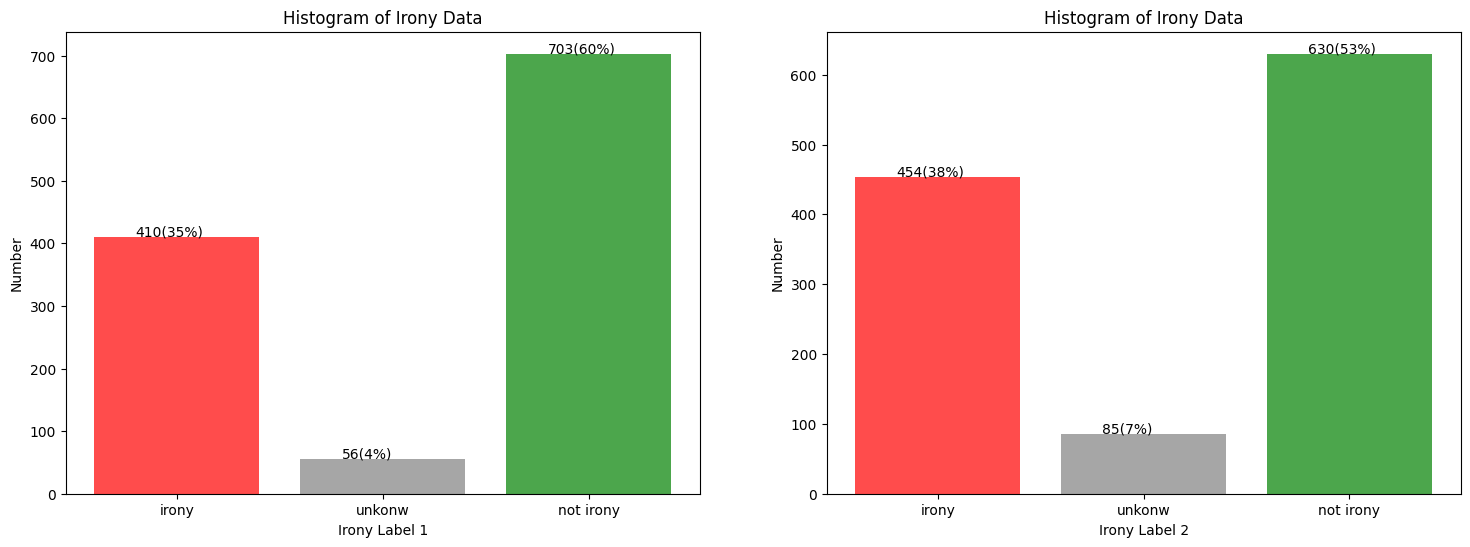

In [122]:
# 分析讽刺标签分布
df = pd.read_csv(data_path, encoding='ansi')
plt.figure(figsize=(18,6))
# 讽刺标签1图
plt.subplot(1, 2, 1)
count_sentiment_series = df[['讽刺标签1']].value_counts()
labels = ['not irony','unkonw','irony']
data=[count_sentiment_series[0], count_sentiment_series[1], count_sentiment_series[2]]
labels.reverse()  # 调换列表的方向，让其与颜色对应，红色才代表讽刺
data.reverse()
sum_number = sum(data)
x_pos = np.arange(len(data))
bars = plt.bar(x_pos, data, align='center', alpha=0.7, tick_label=labels, color=['r', 'grey', 'g'])
for i, y in enumerate(data):
    plt.text(x_pos[i] - 0.2, y + 1.5, f'{y}({int(y/sum_number*100)}%)', )  # 添加标注
plt.title('Histogram of Irony Data')
plt.xlabel('Irony Label 1')
plt.ylabel('Number')
# 讽刺标签2图
plt.subplot(1, 2, 2)
count_sentiment_series = df[['讽刺标签2']].value_counts()
labels = ['not irony','unkonw','irony']
data=[count_sentiment_series[0], count_sentiment_series[1], count_sentiment_series[2]]
labels.reverse()  # 调换列表的方向，让其与颜色对应，红色才代表讽刺
data.reverse()
sum_number = sum(data)
x_pos = np.arange(len(data))
bars = plt.bar(x_pos, data, align='center', alpha=0.7, tick_label=labels, color=['r', 'grey', 'g'])
for i, y in enumerate(data):
    plt.text(x_pos[i] - 0.2, y + 1.5, f'{y}({int(y/sum_number*100)}%)', )  # 添加标注
plt.title('Histogram of Irony Data')
plt.xlabel('Irony Label 2')
plt.ylabel('Number')

# plt.tight_layout(pad=30)
plt.show()

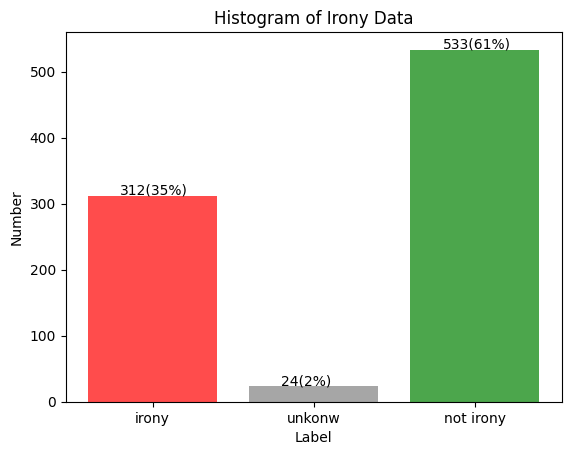

In [123]:
# 分析讽刺标签分布，只取标签1和2相同的部分
df = pd.read_csv(data_path, encoding='ansi')
df = df[(df['讽刺标签1'] == df['讽刺标签2'])]
count_sentiment_series = df[['讽刺标签1']].value_counts()
labels = ['not irony','unkonw','irony']
data=[count_sentiment_series[0], count_sentiment_series[1], count_sentiment_series[2]]
# 调换列表的方向，让其与颜色对应，红色才代表讽刺
labels.reverse()
data.reverse()
sum_number = sum(data)
x_pos = np.arange(len(data))
bars = plt.bar(x_pos, data, align='center', alpha=0.7, tick_label=labels, color=['r', 'grey', 'g'])
for i, y in enumerate(data):
    plt.text(x_pos[i] - 0.2, y + 1.5, f'{y}({int(y/sum_number*100)}%)', )  # 添加标注
plt.title('Histogram of Irony Data')
plt.xlabel('Label')
plt.ylabel('Number')
plt.show()

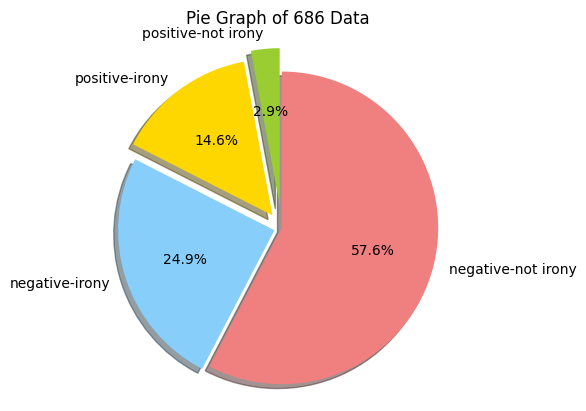

In [132]:
# 绘制饼图
df = pd.read_csv(data_path, encoding='ansi', dtype={'情感标签':'int', '讽刺标签1':'int', '讽刺标签2':'int'})
df = df[(df['讽刺标签1'] == df['讽刺标签2'])]
df = df[df['情感标签'] != 1]
df.loc[(df['情感标签'] == 2)&(df['讽刺标签1'] == 0), "mix_label" ] = 3
df.loc[(df['情感标签'] == 2)&(df['讽刺标签1'] == 2), "mix_label" ] = 2
df.loc[(df['情感标签'] == 0)&(df['讽刺标签1'] == 2), "mix_label" ] = 1
df.loc[(df['情感标签'] == 0)&(df['讽刺标签1'] == 0), "mix_label" ] = 0
labels = 'positive-not irony', 'positive-irony', 'negative-irony', 'negative-not irony'  # 定义标签
count_mix_label_series = df[['mix_label']].value_counts()
count_mix_label_n_ls = [count_mix_label_series[3], count_mix_label_series[2], count_mix_label_series[1], count_mix_label_series[0]]
count_mix_label_percentage_ls = [x/sum(count_mix_label_n_ls)*100 for x in count_mix_label_n_ls]
sizes = count_mix_label_percentage_ls  # 每一块的比例
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']  # 每一块的颜色
explode = (0.15, 0.1, 0.05, 0)  # 突出显示
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # 显示为圆（避免比例压缩为椭圆）
data_n = df.shape[0]
plt.title(f'Pie Graph of {data_n} Data')
plt.show()

In [7]:
# 游览与检查数据数据
import pandas as pd
df = pd.read_csv(data_path, encoding='ansi')
print(df.T.count(axis=1))  # 检查是否有缺失值
df = pd.read_csv(combination_data_path, encoding='ansi')
df = df.fillna(1)
correck_label_ls = [0 , 1, 2]
misstake_df = df[(~df['情感标签'].isin(correck_label_ls)) | (~df['讽刺标签1'].isin(correck_label_ls)) | (~df['讽刺标签2'].isin(correck_label_ls)) ]
if misstake_df.shape[0] == 0:
    print('[No Misstake Data]')
else:
    print('[Mistake Data]')
    print(misstake_df)
# 注意人工标注的数据需要对标注进行检查：例如缺失值，异常值，
df = pd.read_csv(combination_data_path, encoding='ansi', dtype={'情感标签':'int', '讽刺标签1':'int', '讽刺标签2':'int'})  # 默认以utf-8解码会报错
print(df.head())

Comment_ID         1169
Comment_Name       1169
Comment_Content    1169
Comment_Time       1169
简单标签                  0
情感标签               1169
讽刺标签1              1169
讽刺标签2              1169
dtype: int64
[No Misstake Data]


ValueError: Integer column has NA values in column 3

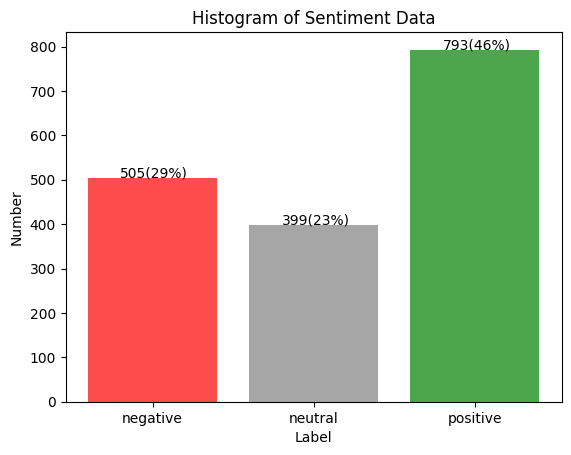

In [8]:
# 分析情绪标签分布
df = pd.read_csv(combination_data_path, encoding='ansi')
count_sentiment_series = df[['情感标签']].value_counts()
labels = ['negative','neutral','positive']
data=[count_sentiment_series[0], count_sentiment_series[1], count_sentiment_series[2]]
sum_number = sum(data)
x_pos = np.arange(len(data))
bars = plt.bar(x_pos, data, align='center', alpha=0.7, tick_label=labels, color=['r', 'grey', 'g'])
for i, y in enumerate(data):
    plt.text(x_pos[i] - 0.2, y + 1.5, f'{y}({int(y/sum_number*100)}%)', )  # 添加标注
plt.title('Histogram of Sentiment Data')
plt.xlabel('Label')
plt.ylabel('Number')
plt.show()

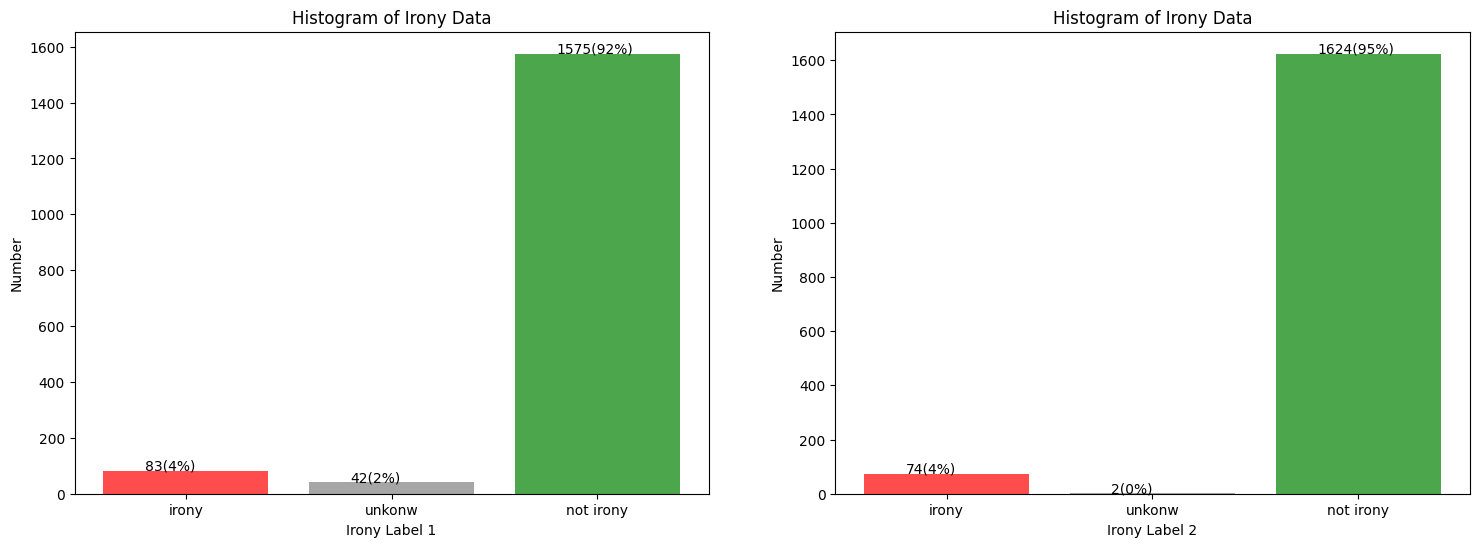

In [9]:
# 分析讽刺标签分布
df = pd.read_csv(combination_data_path, encoding='ansi')
plt.figure(figsize=(18,6))
# 讽刺标签1图
plt.subplot(1, 2, 1)
count_sentiment_series = df[['讽刺标签1']].value_counts()
labels = ['not irony','unkonw','irony']
data=[count_sentiment_series[0], count_sentiment_series[1], count_sentiment_series[2]]
labels.reverse()  # 调换列表的方向，让其与颜色对应，红色才代表讽刺
data.reverse()
sum_number = sum(data)
x_pos = np.arange(len(data))
bars = plt.bar(x_pos, data, align='center', alpha=0.7, tick_label=labels, color=['r', 'grey', 'g'])
for i, y in enumerate(data):
    plt.text(x_pos[i] - 0.2, y + 1.5, f'{y}({int(y/sum_number*100)}%)', )  # 添加标注
plt.title('Histogram of Irony Data')
plt.xlabel('Irony Label 1')
plt.ylabel('Number')
# 讽刺标签2图
plt.subplot(1, 2, 2)
count_sentiment_series = df[['讽刺标签2']].value_counts()
labels = ['not irony','unkonw','irony']
data=[count_sentiment_series[0], count_sentiment_series[1], count_sentiment_series[2]]
labels.reverse()  # 调换列表的方向，让其与颜色对应，红色才代表讽刺
data.reverse()
sum_number = sum(data)
x_pos = np.arange(len(data))
bars = plt.bar(x_pos, data, align='center', alpha=0.7, tick_label=labels, color=['r', 'grey', 'g'])
for i, y in enumerate(data):
    plt.text(x_pos[i] - 0.2, y + 1.5, f'{y}({int(y/sum_number*100)}%)', )  # 添加标注
plt.title('Histogram of Irony Data')
plt.xlabel('Irony Label 2')
plt.ylabel('Number')

# plt.tight_layout(pad=30)
plt.show()

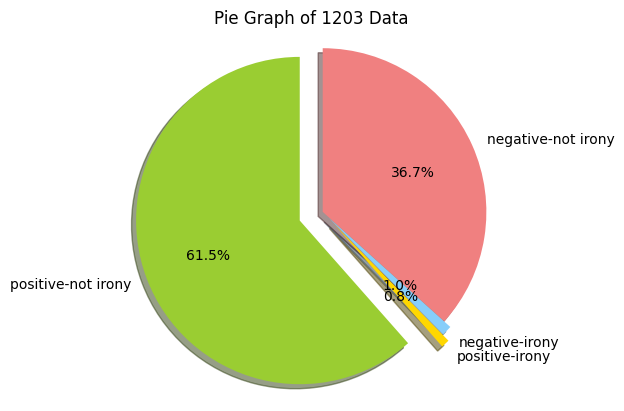

In [10]:
# 绘制饼图
df = pd.read_csv(combination_data_path, encoding='ansi')
# df = pd.read_csv(combination_data_path, encoding='ansi', dtype={'情感标签':'int', '讽刺标签1':'int', '讽刺标签2':'int'})
df = df.fillna(1)
df = df[(df['讽刺标签1'] == df['讽刺标签2'])]
df = df[df['情感标签'] != 1]
df.loc[(df['情感标签'] == 2)&(df['讽刺标签1'] == 0), "mix_label" ] = 3
df.loc[(df['情感标签'] == 2)&(df['讽刺标签1'] == 2), "mix_label" ] = 2
df.loc[(df['情感标签'] == 0)&(df['讽刺标签1'] == 2), "mix_label" ] = 1
df.loc[(df['情感标签'] == 0)&(df['讽刺标签1'] == 0), "mix_label" ] = 0
labels = 'positive-not irony', 'positive-irony', 'negative-irony', 'negative-not irony'  # 定义标签
count_mix_label_series = df[['mix_label']].value_counts()
count_mix_label_n_ls = [count_mix_label_series[3], count_mix_label_series[2], count_mix_label_series[1], count_mix_label_series[0]]
count_mix_label_percentage_ls = [x/sum(count_mix_label_n_ls)*100 for x in count_mix_label_n_ls]
sizes = count_mix_label_percentage_ls  # 每一块的比例
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']  # 每一块的颜色
explode = (0.15, 0.1, 0.05, 0)  # 突出显示
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # 显示为圆（避免比例压缩为椭圆）
data_n = df.shape[0]
plt.title(f'Pie Graph of {data_n} Data')
plt.show()